In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [14]:
NUM_CLASSES = 10

# 学習データ読み込み

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.0938 - loss: 2.3676
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.1149 - loss: 2.3837 - val_accuracy: 0.1868 - val_loss: 2.3070
Epoch 2/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1016 - loss: 2.3082
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1273 - loss: 2.3271 - val_accuracy: 0.1245 - val_loss: 2.2929
Epoch 3/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1797 - loss: 2.3354
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1422 - loss: 2.3325 - val_accuracy: 0.1245 - val_loss: 2.2846
Epoch 4/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1406 - loss: 2.2900
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━

Epoch 55/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8672
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.8241 - val_loss: 0.2242 - val_accuracy: 0.9578
Epoch 56/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4607 - accuracy: 0.7734
Epoch 00056: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8277 - val_loss: 0.2168 - val_accuracy: 0.9605
Epoch 57/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7969
Epoch 00057: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8214 - val_loss: 0.2211 - val_accuracy: 0.9578
Epoch 58/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.4393 - ac

Epoch 82/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5132 - accuracy: 0.8047
Epoch 00082: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8460 - val_loss: 0.2045 - val_accuracy: 0.9605
Epoch 83/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4239 - accuracy: 0.8125
Epoch 00083: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8313 - val_loss: 0.1984 - val_accuracy: 0.9605
Epoch 84/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4853 - accuracy: 0.8203
Epoch 00084: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.8304 - val_loss: 0.2024 - val_accuracy: 0.9623
Epoch 85/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4782 - ac

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [23]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8499 - loss: 0.7503


In [24]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [25]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[0.08288804 0.06206555 0.08941974 0.12328497 0.3166654  0.08459713
 0.00191089 0.00099456 0.16557717 0.07259653]
4


# 混同行列

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


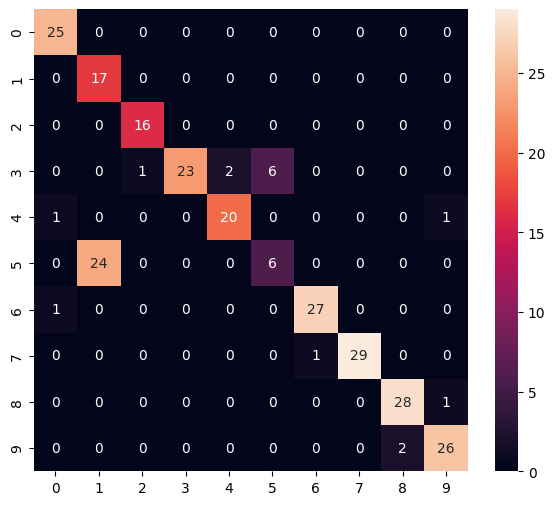

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.41      1.00      0.59        17
           2       0.94      1.00      0.97        16
           3       1.00      0.72      0.84        32
           4       0.91      0.91      0.91        22
           5       0.50      0.20      0.29        30
           6       0.96      0.96      0.96        28
           7       1.00      0.97      0.98        30
           8       0.93      0.97      0.95        29
           9       0.93      0.93      0.93        28

    accuracy                           0.84       257
   macro avg       0.85      0.87      0.84       257
weighted avg       0.87      0.84      0.84       257



In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [27]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [28]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmp6yep1taw\assets


INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmp6yep1taw\assets


Saved artifact at 'C:\Users\kenjl\AppData\Local\Temp\tmp6yep1taw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  3051196399056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3051134042384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3051134042576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3051219051408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3051219048528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3051219052176: TensorSpec(shape=(), dtype=tf.resource, name=None)


6820

# 推論テスト

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.01 ms


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.08288803 0.06206557 0.08941974 0.123285   0.31666538 0.08459714
 0.00191089 0.00099456 0.16557717 0.07259654]
4
